<a href="https://colab.research.google.com/github/josehenriqueroveda/credit_agriculture/blob/master/creditAgroBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit to agriculture in Brazil and rest of the world - 2012 to 2018**
José Henrique Roveda

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_total = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Projects/CreditAgriculture/TotalCredit-Brazil.csv')
df_agro = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Projects/CreditAgriculture/CreditToAgro-Brazil.csv')
df_share = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Projects/CreditAgriculture/ShareOfTotalCredit-Brazil.csv')
df_world = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Projects/CreditAgriculture/CreditToAgro-World.csv')

In [ ]:
df_total.drop(['Domain Code','Domain','Area Code','Area','Element Code','Element','Item Code','Item','Year Code','Unit','Flag','Flag Description'],inplace=True,axis=1)

In [ ]:
df_agro.drop(['Domain Code','Domain','Area Code','Area','Element Code','Element','Item Code','Item','Year Code','Unit','Flag','Flag Description'],inplace=True,axis=1)

In [ ]:
df_share.drop(['Domain Code','Domain','Area Code','Area','Element Code','Element','Item Code','Item','Year Code','Unit','Flag','Flag Description'],inplace=True,axis=1)

In [ ]:
df_world.drop(['Domain Code','Domain','Area Code','Area','Element Code','Element','Item Code','Item','Year Code','Unit','Flag','Flag Description'],inplace=True,axis=1)

**Total credit in Brazil:**

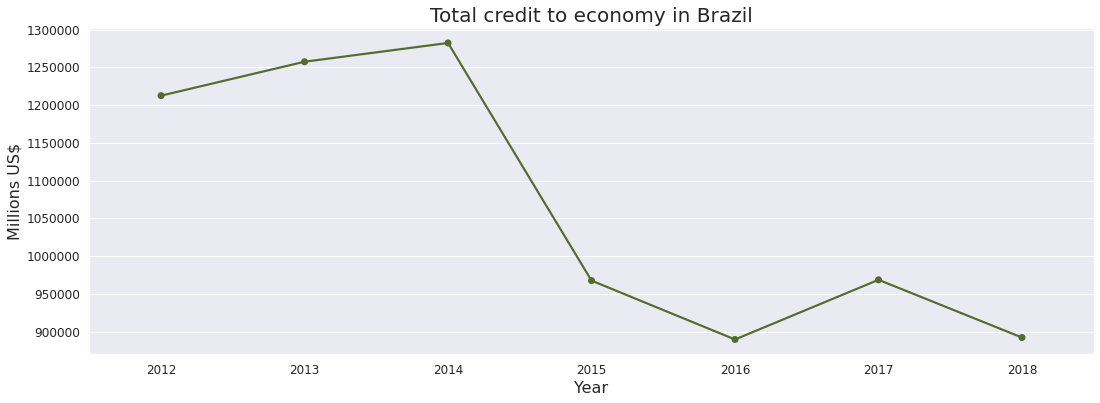

In [ ]:
sns.set(style='darkgrid', font_scale=1.1)
plt.figure(figsize=(18,6))

g = sns.pointplot(x=df_total.Year, y=df_total.Value, color='darkolivegreen', scale=0.8)
g.set_xticklabels(labels=df_total['Year'], fontsize=12, rotation=0)
g.set_xlabel(xlabel='Year', fontsize=16)
g.set_ylabel(ylabel='Millions US$', fontsize=16)
g.set_title(label='Total credit to economy in Brazil', fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Credit to agriculture in Brazil**

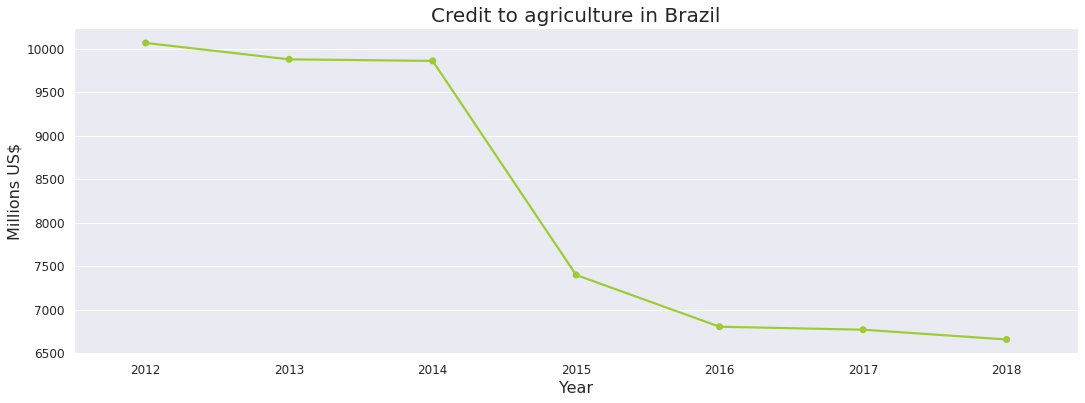

In [ ]:
plt.figure(figsize=(18,6))

g1 = sns.pointplot(x=df_agro.Year, y=df_agro.Value, color='yellowgreen', scale=0.8)
g1.set_xticklabels(labels=df_agro['Year'], fontsize=12, rotation=0)
g1.set_xlabel(xlabel='Year', fontsize=16)
g1.set_ylabel(ylabel='Millions US$', fontsize=16)
g1.set_title(label='Credit to agriculture in Brazil', fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Comparing Total credit vs Credit to agriculture in Brazil:**

In [ ]:
df_credit = pd.merge(df_total, df_agro, left_on='Year', right_on='Year', left_index=True)

In [ ]:
df_credit.rename(columns={'Value_x':'Total_credit',
                          'Value_y':'Agro_credit'}, 
                 inplace=True)
df_credit

,Year,Total_credit,Agro_credit
0,2012,1212604.58,10067.58487
1,2013,1257534.90,9879.41190
2,2014,1282386.74,9861.45346
3,2015,967633.23,7401.18429
4,2016,889684.36,6806.63363
5,2017,968709.66,6772.57630
6,2018,892269.42,6660.18939


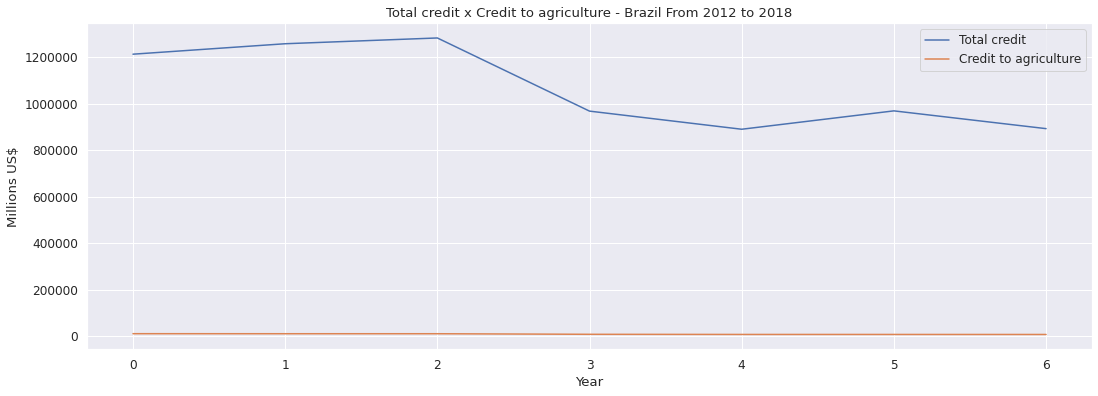

In [ ]:
plt.figure(figsize=(18,6))

plt.title('Total credit x Credit to agriculture - Brazil From 2012 to 2018')

sns.lineplot(data=df_credit['Total_credit'], label="Total credit")
sns.lineplot(data=df_credit['Agro_credit'], label="Credit to agriculture")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Millions US$')

plt.show()

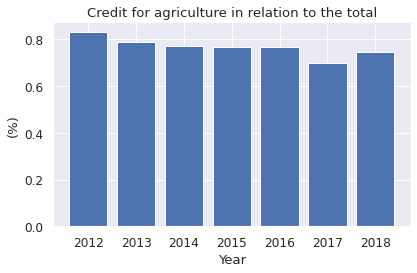

In [ ]:
x = np.arange(7)
fig, ax = plt.subplots()
plt.bar(x, df_share.Value)
plt.xticks(x, df_credit.Year)
plt.title('Credit for agriculture in relation to the total')
plt.xlabel('Year')
plt.ylabel('(%)')
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.show()

In [ ]:
df_share_world = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Projects/CreditAgriculture/ShareOfTotalCredit-World.csv')

In [ ]:
df_share_world.drop(['Domain Code','Domain','Area Code','Element Code','Element','Item Code','Item','Year Code','Unit','Flag','Flag Description'],inplace=True,axis=1)

In [ ]:
df_share_world.head()

,Area,Year,Value
0,Albania,2012,1.63329
1,Albania,2013,1.78055
2,Albania,2014,1.75173
3,Albania,2015,1.96151
4,Angola,2012,2.92667


In [ ]:
df_share_mean = df_share_world.groupby('Area', as_index=False)['Value'].mean()

In [ ]:
df_share_sorted = df_share_mean.sort_values(by=['Value'], ascending=False)

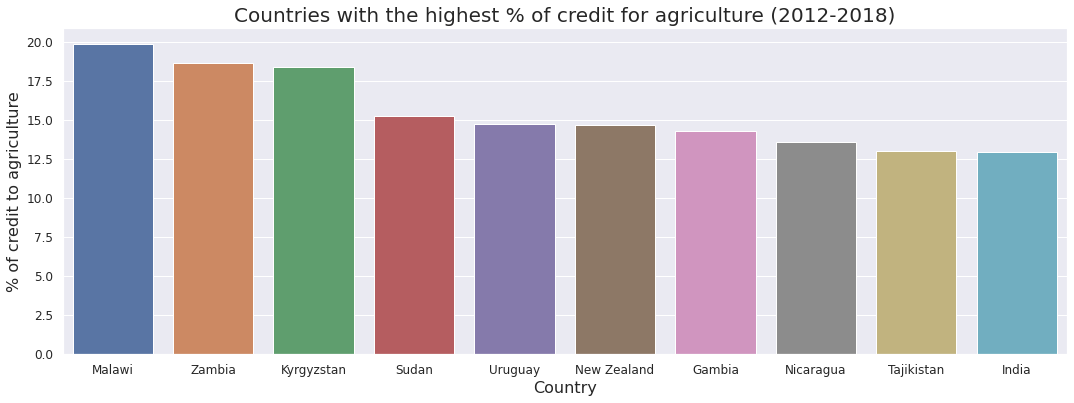

In [ ]:
plt.figure(figsize=(18,6))

g2 = sns.barplot(x=df_share_sorted.Area[:10], y=df_share_sorted.Value)
g2.set_xticklabels(labels=df_share_sorted['Area'], fontsize=12, rotation=0)
g2.set_xlabel(xlabel='Country', fontsize=16)
g2.set_ylabel(ylabel='% of credit to agriculture', fontsize=16)
g2.set_title(label='Countries with the highest % of credit for agriculture (2012-2018)', fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()